In [30]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
my_file = pd.read_csv('spatial.csv')
my_file.head()

,Frame Number,Person Count,Activity Indicator,Seconds
0,0,0,False,0.000000
1,1,6,True,0.000000
2,2,6,True,0.066733
3,3,6,True,0.133467
4,4,5,True,0.200200


In [4]:
def extract_Frame_Number(row,Person):
    if row['Person Count'] == Person:
        return int(row['Frame Number'])

In [5]:
Person_col = my_file['Person Count']
Max_people = Person_col.max(axis=0)
Min_people = Person_col.min(axis=0)
Active_Frames = my_file['Activity Indicator']
Total_Frames = len(my_file)

In [6]:
Busiest_Frames = my_file.apply(extract_Frame_Number,axis=1, args=[Max_people])
Busiest_Frames.dropna(inplace=True)
Busiest_Frames = Busiest_Frames.to_numpy(dtype=int)
Busiest_Frames

array([185, 202])

In [22]:
import cv2

# Get 5 Busiest Frames in the processed videos
reader = cv2.VideoCapture('../videos/processed/my_video_feed.avi') # The Processed Video frames written by Thread-1
Images = []
for frame in Busiest_Frames:
    reader.set(cv2.CAP_PROP_POS_FRAMES,frame)
    Images.append(reader.read())
Total_Images = len(Images)

In [35]:
for x in range(Total_Images):
    im = Image.fromarray(Images[x][1])
    im.save(f'Image_{x}.jpg')

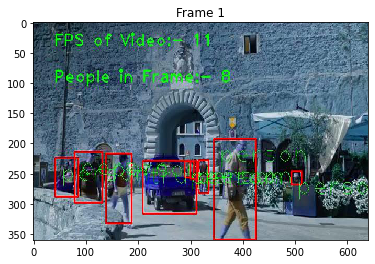

In [62]:
if Total_Images == 1:
    Image1 = Image.open('Image_0.jpg')
    fig, ax = plt.subplots(1,1)
    ax.imshow(Image1, interpolation='nearest', aspect='auto')
    ax.set_title('Frame 1')
    #plt.show()

if Total_Images == 2:
    Image1 = Image.open('Image_0.jpg')
    Image2 = Image.open('Image_1.jpg')
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(Image1, interpolation='nearest', aspect='auto')
    ax[0].set_title('Frame 1')
    ax[1].imshow(Image2, interpolation='nearest', aspect='auto')
    ax[1].set_title('Frame 2')
    #print(Image1.size)
    #plt.show()

if Total_Images == 3:
    Image1 = Image.open('Image_0.jpg')
    Image2 = Image.open('Image_1.jpg')
    Image3 = Image.open('Image_2.jpg')
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(Image1, interpolation='nearest', aspect='auto')
    ax[0].set_title('Frame 1')
    ax[1].imshow(Image2, interpolation='nearest', aspect='auto')
    ax[1].set_title('Frame 2')
    ax[2].imshow(Image3, interpolation='nearest', aspect='auto')
    ax[2].set_title('Frame 3')
    #print(Image1.size)
    #plt.show()
    
    
if Total_Images == 4:
    Image1 = Image.open('Image_0.jpg')
    Image2 = Image.open('Image_1.jpg')
    Image3 = Image.open('Image_2.jpg')
    Image4 = Image.open('Image_3.jpg')
    fig, ax = plt.subplots(2,2)
    ax[0,0].imshow(Image1, interpolation='nearest', aspect='auto')
    ax[0,0].set_title('Frame 1')
    ax[0,1].imshow(Image2, interpolation='nearest', aspect='auto')
    ax[0,1].set_title('Frame 2')
    ax[1,0].imshow(Image3, interpolation='nearest', aspect='auto')
    ax[1,0].set_title('Frame 3')
    ax[1,1].imshow(Image4, interpolation='nearest', aspect='auto')
    ax[1,1].set_title('Frame 4')
    #print(Image1.size)
    #plt.show()
    
# fig, axs = plt.subplots(2, 2)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

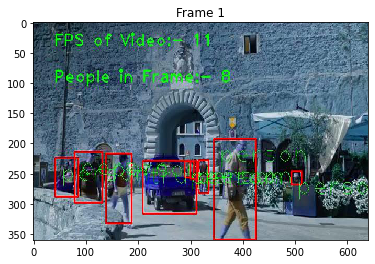

In [68]:
fig

In [63]:
def active_frames(row):
    if row['Activity Indicator'] == True:
        return row
    else:
        return None
    
def inactive_frames(row):
    if row['Activity Indicator'] == False:
        return row
    else:
        return None

In [65]:
# Calculating Ideal time and Active Time

Active_frames = my_file.apply(active_frames,axis=1)
Active_frames.dropna(inplace=True)

InActive_frames = my_file.apply(inactive_frames,axis=1)
InActive_frames.dropna(inplace=True)

Interesting_ratio = len(Active_frames)/(len(Active_frames)+len(InActive_frames))
print(Interesting_ratio)

0.740909090909091
